## Dropout : A simple way to Prevent Neural Networks from Overfitting


In this notebook, we experiment with dropouts on MNIST data set. The aim is recreate the experiment results given in section 6.1.1 in the paper https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

This section compares the neural networks with and without dropouts for MNIST dataset.

MNIST dataset is available with Keras. It consists of 28 x 28 pixel handwritten digit images.


In [6]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape {}".format(x_train.shape))
print("y_train shape {}".format(y_train.shape))
print("x_test shape {}".format(x_test.shape))
print("x_train shape {}".format(y_test.shape))



x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
x_train shape (10000,)


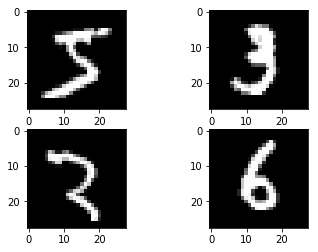

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[10], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[500], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[1020], cmap = plt.get_cmap('gray'))
plt.show()

In [8]:
from keras.utils import np_utils

## One hot encoder
train_one_hot =  np_utils.to_categorical(y_train)
test_one_hot  = np_utils.to_categorical(y_test)

print("train one hot shapec {}".format(train_one_hot.shape))

train one hot shapec (60000, 10)


In [9]:
input_dim = x_train.shape[1:]
input_dim

(28, 28)

## Model 1 
----
28 x 28 --- Flatten --> 784 --Dense--> 1024, Relu --Dense--> 1024, Relu --softmax--> 10 


batch_size = 256
epochs = 25
learning_rate = 0.01
momentum = 0.0
decay = 0.0



In [10]:
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.callbacks import History, EarlyStopping
from keras.models import Model 
from keras import optimizers

import numpy as np
np.random.seed(123)


batch_size = 256
epochs = 100
learning_rate = 0.01
momentum = 0.0
decay = 0.0
early_stop_th = 10**-5


# Stop the training if the accuracy is not moving more than a delta
# keras.callbacks.History is by default added to all keras model
callbacks = [EarlyStopping(monitor='acc', min_delta=early_stop_th, patience=5, verbose=0, mode='auto')]

# Code up the network
x_input = Input(input_dim)
x = Flatten()(x_input)
x = Dense(1024, activation='relu', name ="dense1")(x)
x = Dense(1024, activation='relu', name = "dense2")(x)
predictions = Dense(10, activation='softmax')(x)

# Optimizer
sgd = optimizers.SGD(lr=0.01, momentum=0, decay=0, nesterov=False)


# Create and train model
model = Model(inputs = x_input, outputs = predictions)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, train_one_hot, validation_split = 0.1, batch_size = batch_size,callbacks = callbacks ,epochs = epochs, verbose = 1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 8s 148us/step - loss: 11.5741 - acc: 0.2810 - val_loss: 11.1994 - val_acc: 0.3052
Epoch 2/100
54000/54000 [==============================] - 8s 140us/step - loss: 11.3615 - acc: 0.2948 - val_loss: 11.1725 - val_acc: 0.3062
Epoch 3/100
54000/54000 [==============================] - 7s 137us/step - loss: 11.3340 - acc: 0.2966 - val_loss: 11.1378 - val_acc: 0.3088
Epoch 4/100
54000/54000 [==============================] - 7s 136us/step - loss: 11.3158 - acc: 0.2978 - val_loss: 11.1542 - val_acc: 0.3078
Epoch 5/100
54000/54000 [==============================] - 7s 137us/step - loss: 11.3027 - acc: 0.2986 - val_loss: 11.1738 - val_acc: 0.3067
Epoch 6/100
54000/54000 [==============================] - 8s 144us/step - loss: 11.3035 - acc: 0.2985 - val_loss: 11.1623 - val_acc: 0.3073
Epoch 7/100
54000/54000 [==============================] - 8s 146us/step - loss: 11.0754 - acc: 0.3124 - 

54000/54000 [==============================] - 9s 172us/step - loss: 1.3715 - acc: 0.9122 - val_loss: 0.4726 - val_acc: 0.9657
Epoch 60/100
54000/54000 [==============================] - 9s 165us/step - loss: 0.4105 - acc: 0.9704 - val_loss: 0.4393 - val_acc: 0.9687
Epoch 61/100
54000/54000 [==============================] - 9s 161us/step - loss: 0.3223 - acc: 0.9769 - val_loss: 0.3990 - val_acc: 0.9722
Epoch 62/100
54000/54000 [==============================] - 9s 165us/step - loss: 0.2820 - acc: 0.9798 - val_loss: 0.3287 - val_acc: 0.9747
Epoch 63/100
54000/54000 [==============================] - 9s 166us/step - loss: 0.2588 - acc: 0.9810 - val_loss: 0.3942 - val_acc: 0.9710
Epoch 64/100
54000/54000 [==============================] - 9s 161us/step - loss: 0.2237 - acc: 0.9835 - val_loss: 0.3013 - val_acc: 0.9780
Epoch 65/100
54000/54000 [==============================] - 9s 166us/step - loss: 0.2017 - acc: 0.9851 - val_loss: 0.2920 - val_acc: 0.9790
Epoch 66/100
54000/54000 [=======

In [30]:
hist.history.keys()

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])

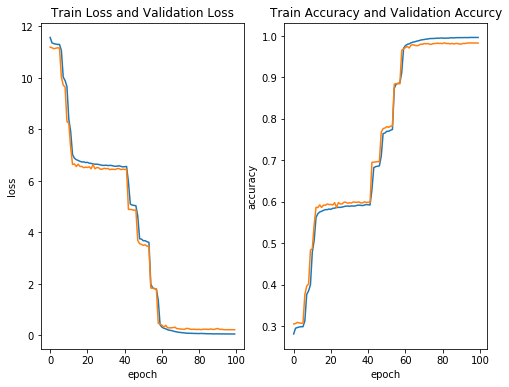

In [13]:
def plot_training(hist):

    fig = plt.figure(figsize=(8,6))
    plt.tight_layout()
    plt.subplot(121)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("Train Loss and Validation Loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc='upper left')
    plt.subplot(122)
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title("Train Accuracy and Validation Accurcy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc='upper left')



plot_training(hist)


## Plot the model

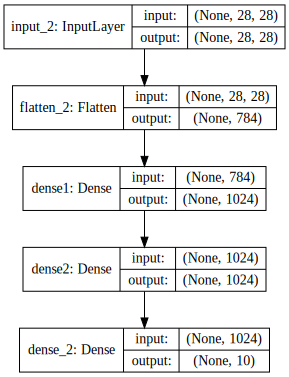

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))




In [33]:
## Evaluate the model on train and test

def print_metrics(model,x_train, train_one_hot, x_test, test_one_hot):
    metrics = model.evaluate(x=x_train, y=train_one_hot, batch_size=batch_size, verbose=1, sample_weight=None, steps=None)
    print("Train Evaluation\n")
    for k,v in zip(model.metrics_names,metrics):
        print (k,v)
    print('error {}'.format(1-v))

    print("\nTest Evaluation\n")
    metrics = model.evaluate(x=x_test, y=test_one_hot, batch_size=batch_size, verbose=1, sample_weight=None, steps=None)
    for k,v in zip(model.metrics_names,metrics):
        print (k,v)
    print('error {}'.format(1-v))


print_metrics(model,x_train, train_one_hot, x_test, test_one_hot)


60000/60000 [==============================] - 4s 60us/step
Train Evaluation

loss 0.0748422057182
acc 0.995050000032
error 0.004949999968210883

Test Evaluation

10000/10000 [==============================] - 1s 50us/step
loss 0.259364228643
acc 0.9789
error 0.021100000000000008


## Model 2 : With drop out enabled at input layer


8 x 28 --- Flatten --> 784 --Dropout(0.1) --Dense--> 1024, Relu --Dense--> 1024, Relu --softmax--> 10
batch_size = 256 epochs = 25 learning_rate = 0.01 momentum = 0.0 decay = 0.0

In [44]:
from keras.layers import Dropout


batch_size = 256
epochs = 200
learning_rate = 0.09
momentum = 0.0
decay = 0.0
early_stop_th = 10**-5

# Code up the network
x_input = Input(input_dim)
x = Flatten()(x_input)
x = Dropout(rate = 0.1)(x)
x = Dense(1024, activation='relu', name ="dense1")(x)
x = Dense(1024, activation='relu', name = "dense2")(x)
predictions = Dense(10, activation='softmax')(x)


# Stop the training if the accuracy is not moving more than a delta
# keras.callbacks.History is by default added to all keras model
callbacks = [EarlyStopping(monitor='acc', min_delta=early_stop_th, patience=5, verbose=0, mode='auto')]


# Optimizer
sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay, nesterov=False)


# Create and train model
model_1 = Model(inputs = x_input, outputs = predictions)
model_1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
hist_1 = model_1.fit(x_train, train_one_hot, validation_split = 0.1, batch_size = batch_size,callbacks = callbacks ,epochs = epochs, verbose = 1)



Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 8s 149us/step - loss: 14.1472 - acc: 0.1221 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 2/200
54000/54000 [==============================] - 8s 152us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/200
54000/54000 [==============================] - 8s 155us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/200
54000/54000 [==============================] - 8s 152us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/200
54000/54000 [==============================] - 8s 147us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/200
54000/54000 [==============================] - 8s 148us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050


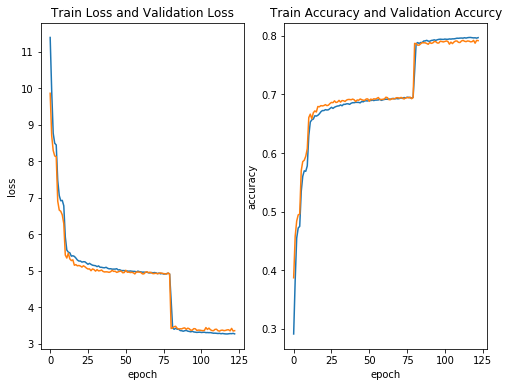

In [41]:
plot_training(hist_1)

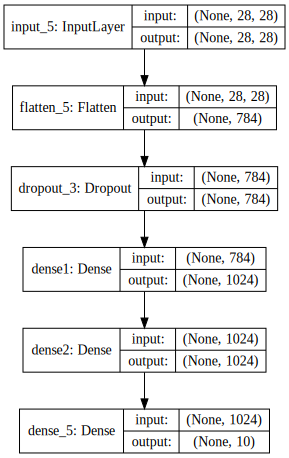

In [42]:
SVG(model_to_dot(model_1, show_shapes=True).create(prog='dot', format='svg'))



In [45]:
print_metrics(model_1,x_train, train_one_hot, x_test, test_one_hot)



60000/60000 [==============================] - 3s 51us/step
Train Evaluation

loss 14.3069645879
acc 0.112366666667
error 0.8876333333333333

Test Evaluation

10000/10000 [==============================] - 1s 50us/step
loss 14.288697316
acc 0.1135
error 0.8865


## Trail notes

*100 Epochs, Learning Rate = 0.01, Train accuracy, 0.68, Test accuracy = 0.68
*123 Epochs, Learning Rate = 0.01, Train accuracy, 0.79, Test accuracy = 0.79
*6 Epochs, Learning Rate = 0.09, Train accuracy, 0.1, Test accuracy = 0.1




## Model 3 : With drop out enabled at input layer and hidden layers and max norm regularization


28 x 28 --- Flatten --> 784 --Dropout(0.1) --Dense--> 1024, Relu --> Dropout(0.4) --Dense--> 1024, Relu --softmax--> 10


batch_size = 256 epochs = 25 learning_rate = 0.05 momentum = 0.995 decay = 0.0

In [ ]:
from keras.constraints import max_norm



batch_size = 256
epochs = 200
learning_rate = 0.01
momentum = 0.995
decay = 0.0
early_stop_th = 10**-5
max_norm_c = 1.0



# Code up the network
x_input = Input(input_dim)
x = Flatten()(x_input)
x = Dropout(rate = 0.1)(x)
x = Dense(1024, activation='relu', name ="dense1", kernel_constraint = max_norm(max_norm_c))(x)
x = Dropout(rate = 0.4)(x)
x = Dense(1024, activation='relu', name = "dense2",kernel_constraint = max_norm(max_norm_c))(x)
predictions = Dense(10, activation='softmax')(x)


# Stop the training if the accuracy is not moving more than a delta
# keras.callbacks.History is by default added to all keras model
callbacks = [EarlyStopping(monitor='acc', min_delta=early_stop_th, patience=5, verbose=0, mode='auto')]


# Optimizer
sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay, nesterov=False)


# Create and train model
model_2 = Model(inputs = x_input, outputs = predictions)
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
hist_2 = model_1.fit(x_train, train_one_hot, validation_split = 0.1, batch_size = batch_size,callbacks = callbacks ,epochs = epochs, verbose = 1)




Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 8s 147us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 2/200
54000/54000 [==============================] - 8s 144us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/200
54000/54000 [==============================] - 8s 142us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/200
54000/54000 [==============================] - 8s 143us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/200
54000/54000 [==============================] - 8s 142us/step - loss: 14.2938 - acc: 0.1132 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/200
14592/54000 [=======>......................] - ETA: 5s - loss: 14.3187 - acc: 0.1116